In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer

In [11]:
def statevector_from_aer(circ: QuantumCircuit) -> np.ndarray:
    backend = Aer.get_backend("aer_simulator_statevector")
    tqc = transpile(circ, backend)
    tqc.save_statevector()
    result = backend.run(tqc).result()
    return np.asarray(result.get_statevector(tqc), dtype=np.complex128)


In [12]:
class QubitSystem:
    def __init__(self, statevector: np.ndarray, label: str = "Qubit System"):
        self.label = label
        self.set_statevector(statevector)

    def set_statevector(self, statevector: np.ndarray):
        sv = np.asarray(statevector, dtype=np.complex128).flatten()
        if sv.ndim != 1:
            raise ValueError("Statevector must be 1D.")
        n_states = sv.size
        n_qubits = int(round(math.log2(n_states)))
        if 2**n_qubits != n_states:
            raise ValueError("Length must be a power of 2.")
        # Defensive normalization (harmless if already normalized)
        norm = np.linalg.norm(sv)
        if norm != 0 and not np.isclose(norm, 1.0):
            sv = sv / norm

        self.n_qubits = n_qubits
        self.n_states = n_states
        self.amps  = sv
        self.prob  = np.abs(sv)**2
        self.phase = np.angle(sv)

    def viz_circle(self, max_cols: int = 8, figsize_scale: float = 2.3):
        cols = max(1, min(max_cols, self.n_states))
        rows = int(math.ceil(self.n_states / cols))

        fig, axes = plt.subplots(
            rows, cols,
            figsize=(cols*figsize_scale, rows*(figsize_scale+0.2))
        )
        axes = np.atleast_2d(axes)

        def bitstr(i: int, n: int) -> str:
            return format(i, f"0{n}b")

        for idx in range(rows * cols):
            r, c = divmod(idx, cols)
            ax = axes[r, c]
            ax.set_aspect("equal")
            ax.set_xlim(0, 1); ax.set_ylim(0, 1)
            ax.axis("off")

            if idx >= self.n_states:
                ax.set_visible(False)
                continue

            # Outer reference circle
            ax.add_patch(plt.Circle((0.5, 0.5), 0.48, fill=False, lw=1.0, alpha=0.5))

            # Filled disk: radius ∝ sqrt(probability) so area ∝ probability
            radius = 0.48 * np.sqrt(self.prob[idx])
            ax.add_patch(plt.Circle((0.5, 0.5), radius, alpha=0.25))

            # Phase arrow
            angle = self.phase[idx]
            L = 0.45
            x2 = 0.5 + L * np.cos(angle)
            y2 = 0.5 + L * np.sin(angle)
            ax.arrow(0.5, 0.5, x2 - 0.5, y2 - 0.5,
                     head_width=0.03, head_length=0.05, length_includes_head=True)

            ax.set_title(f"|{bitstr(idx, self.n_qubits)}⟩", fontsize=10)

        fig.suptitle(self.label, fontsize=12)
        plt.tight_layout()
        plt.show()


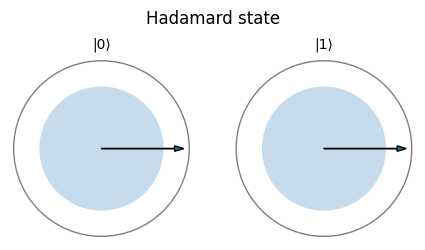

In [13]:
qc = QuantumCircuit(1, name="H on |0>")
qc.h(0)

sv = statevector_from_aer(qc)
QubitSystem(sv, label="Hadamard state").viz_circle()


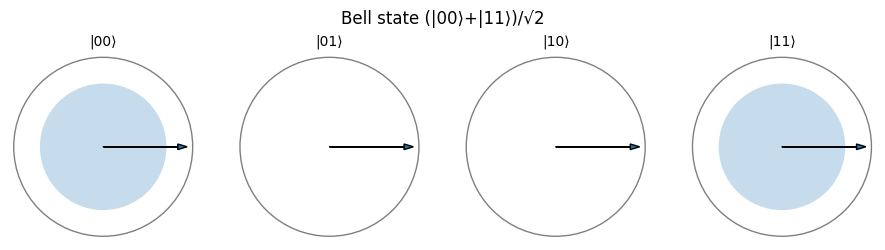

In [14]:
qc = QuantumCircuit(2, name="Bell")
qc.h(0)
qc.cx(0, 1)

sv = statevector_from_aer(qc)
QubitSystem(sv, label="Bell state (|00⟩+|11⟩)/√2").viz_circle()

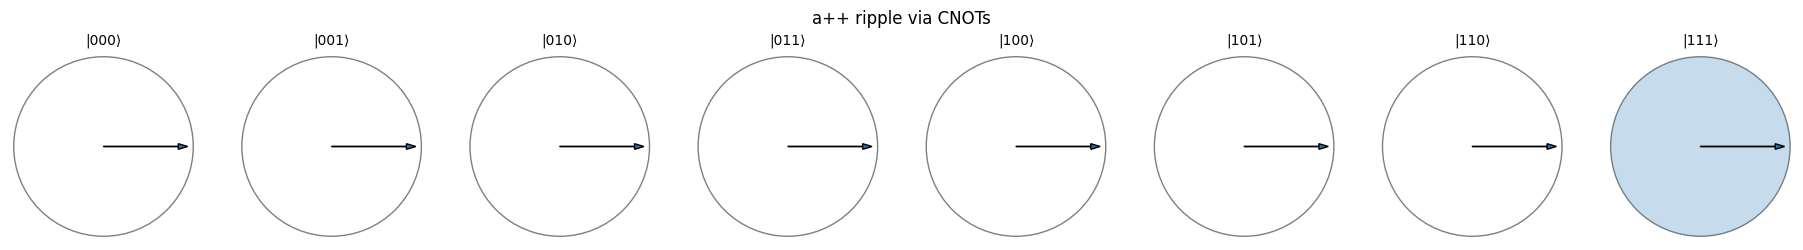

In [15]:
qc = QuantumCircuit(3, name="a++ ripple (CNOT only)")
qc.x(0)          # Start at |001⟩
qc.cx(0, 1)      # If LSB is 1, flip the next bit: |001⟩ → |011⟩
qc.cx(1, 2)      # If middle bit now 1, flip MSB:   |011⟩ → |111⟩

sv = statevector_from_aer(qc)
QubitSystem(sv, label="a++ ripple via CNOTs").viz_circle()


In [16]:
def read(self):
     self.possible_outcome = np.arange(self.n_states)
     self.prob_qubit = np.square(np.absolute(self.qubit))
     # weighted random number generation
     x = random.choices(self.possible_outcome,weights=self.prob_qubit)
     print("Read Quantum State = ", x)


In [17]:
def read_multiple(self,n_shots=1000):
        self.possible_outcome = np.arange(self.n_states)
        self.prob_qubit = np.square(np.absolute(self.qubit))
        # initialize vector for measurements
        self.measurement_state = np.zeros((self.n_states),dtype=np.int)
        # make many shots with measurements
        for i in range(n_shots):
             x = random.choices(self.possible_outcome,weights=self.prob_qubit)
             self.measurement_state[x] = self.measurement_state[x] + 1
        #print(self.measurement_state)
        plt.grid(b=True)
        plt.bar(self.possible_outcome,self.measurement_state/n_shots)
        plt.xlabel('Quantum States')
        plt.ylabel('Probability')
        plt.xticks(self.possible_outcome, rotation = '65')
        plt.show()


In [23]:
class QubitSystem:
    def __init__(self, statevector: np.ndarray, label: str = "Qubit System"):
        self.label = label
        self.set_statevector(statevector)

    def set_statevector(self, statevector: np.ndarray):
        sv = np.asarray(statevector, dtype=np.complex128).flatten()
        if sv.ndim != 1:
            raise ValueError("Statevector must be 1D.")
        n_states = sv.size
        n_qubits = int(round(math.log2(n_states)))
        if 2**n_qubits != n_states:
            raise ValueError("Length must be a power of 2.")
        norm = np.linalg.norm(sv)
        if norm != 0 and not np.isclose(norm, 1.0):
            sv = sv / norm

        self.n_qubits = n_qubits
        self.n_states = n_states
        self.amps  = sv
        self.prob  = np.abs(sv)**2
        self.phase = np.angle(sv)
        self.qubit = sv  # keep the state for measurement

    # --- Add these methods ---
    def read(self):
        self.possible_outcome = np.arange(self.n_states)
        self.prob_qubit = np.square(np.absolute(self.qubit))
        x = random.choices(self.possible_outcome, weights=self.prob_qubit)
        print("Read Quantum State = ", x[0])
        return x[0]

    def read_multiple(self, n_shots=1000):
        self.possible_outcome = np.arange(self.n_states)
        self.prob_qubit = np.square(np.absolute(self.qubit))
        self.measurement_state = np.zeros((self.n_states), dtype=int)

        for _ in range(n_shots):
            x = random.choices(self.possible_outcome, weights=self.prob_qubit)
            self.measurement_state[x[0]] += 1

        plt.bar(self.possible_outcome, self.measurement_state / n_shots)
        plt.xlabel("Quantum States")
        plt.ylabel("Probability")
        plt.title(f"{self.label} ({n_shots} shots)")
        plt.grid(True)
        plt.show()

        return self.measurement_state


Read Quantum State =  1


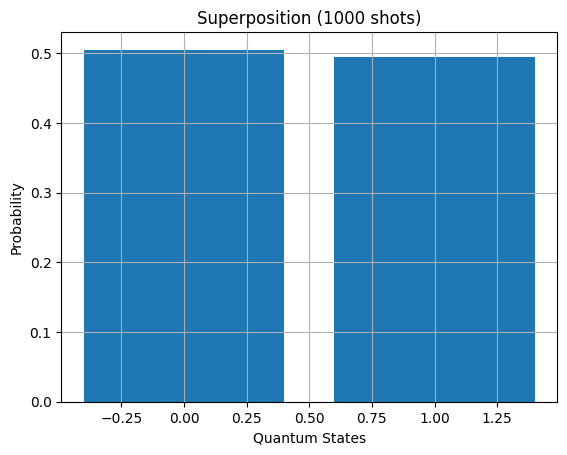

array([505, 495])

: 

In [ ]:
# Example: equal superposition |ψ> = (|0> + |1>) / √2
state = np.array([1/np.sqrt(2), 1/np.sqrt(2)], dtype=complex)

qs = QubitSystem(state, label="Superposition")

# Single-shot measurement
qs.read()

# Multiple-shot measurements with histogram
qs.read_multiple(n_shots=1000)
